In [1]:
%load_ext autoreload
%autoreload 2

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation
import pandas as pd
import csv
from nilearn import plotting
from mcmc import multi_metropolis, metropolis

In [36]:
#importing dti matrix
with open('DTI_avg.csv', 'r') as file:
    reader = csv.reader(file, delimiter=',')
    data = list(reader)
DTI_log = pd.DataFrame(data, dtype = 'float64')
DTI= DTI_log.values
n = 90

In [5]:
coordinates = pd.read_csv('coordinates.csv')
coordinates = coordinates[['x', 'y', 'z']].to_numpy()

In [94]:
T = 20.8
spins = np.random.choice([-1,1], size=90)
sim_data = metropolis(spins, 2000, T, DTI)

MovieWriter ffmpeg unavailable; using Pillow instead.


0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
0


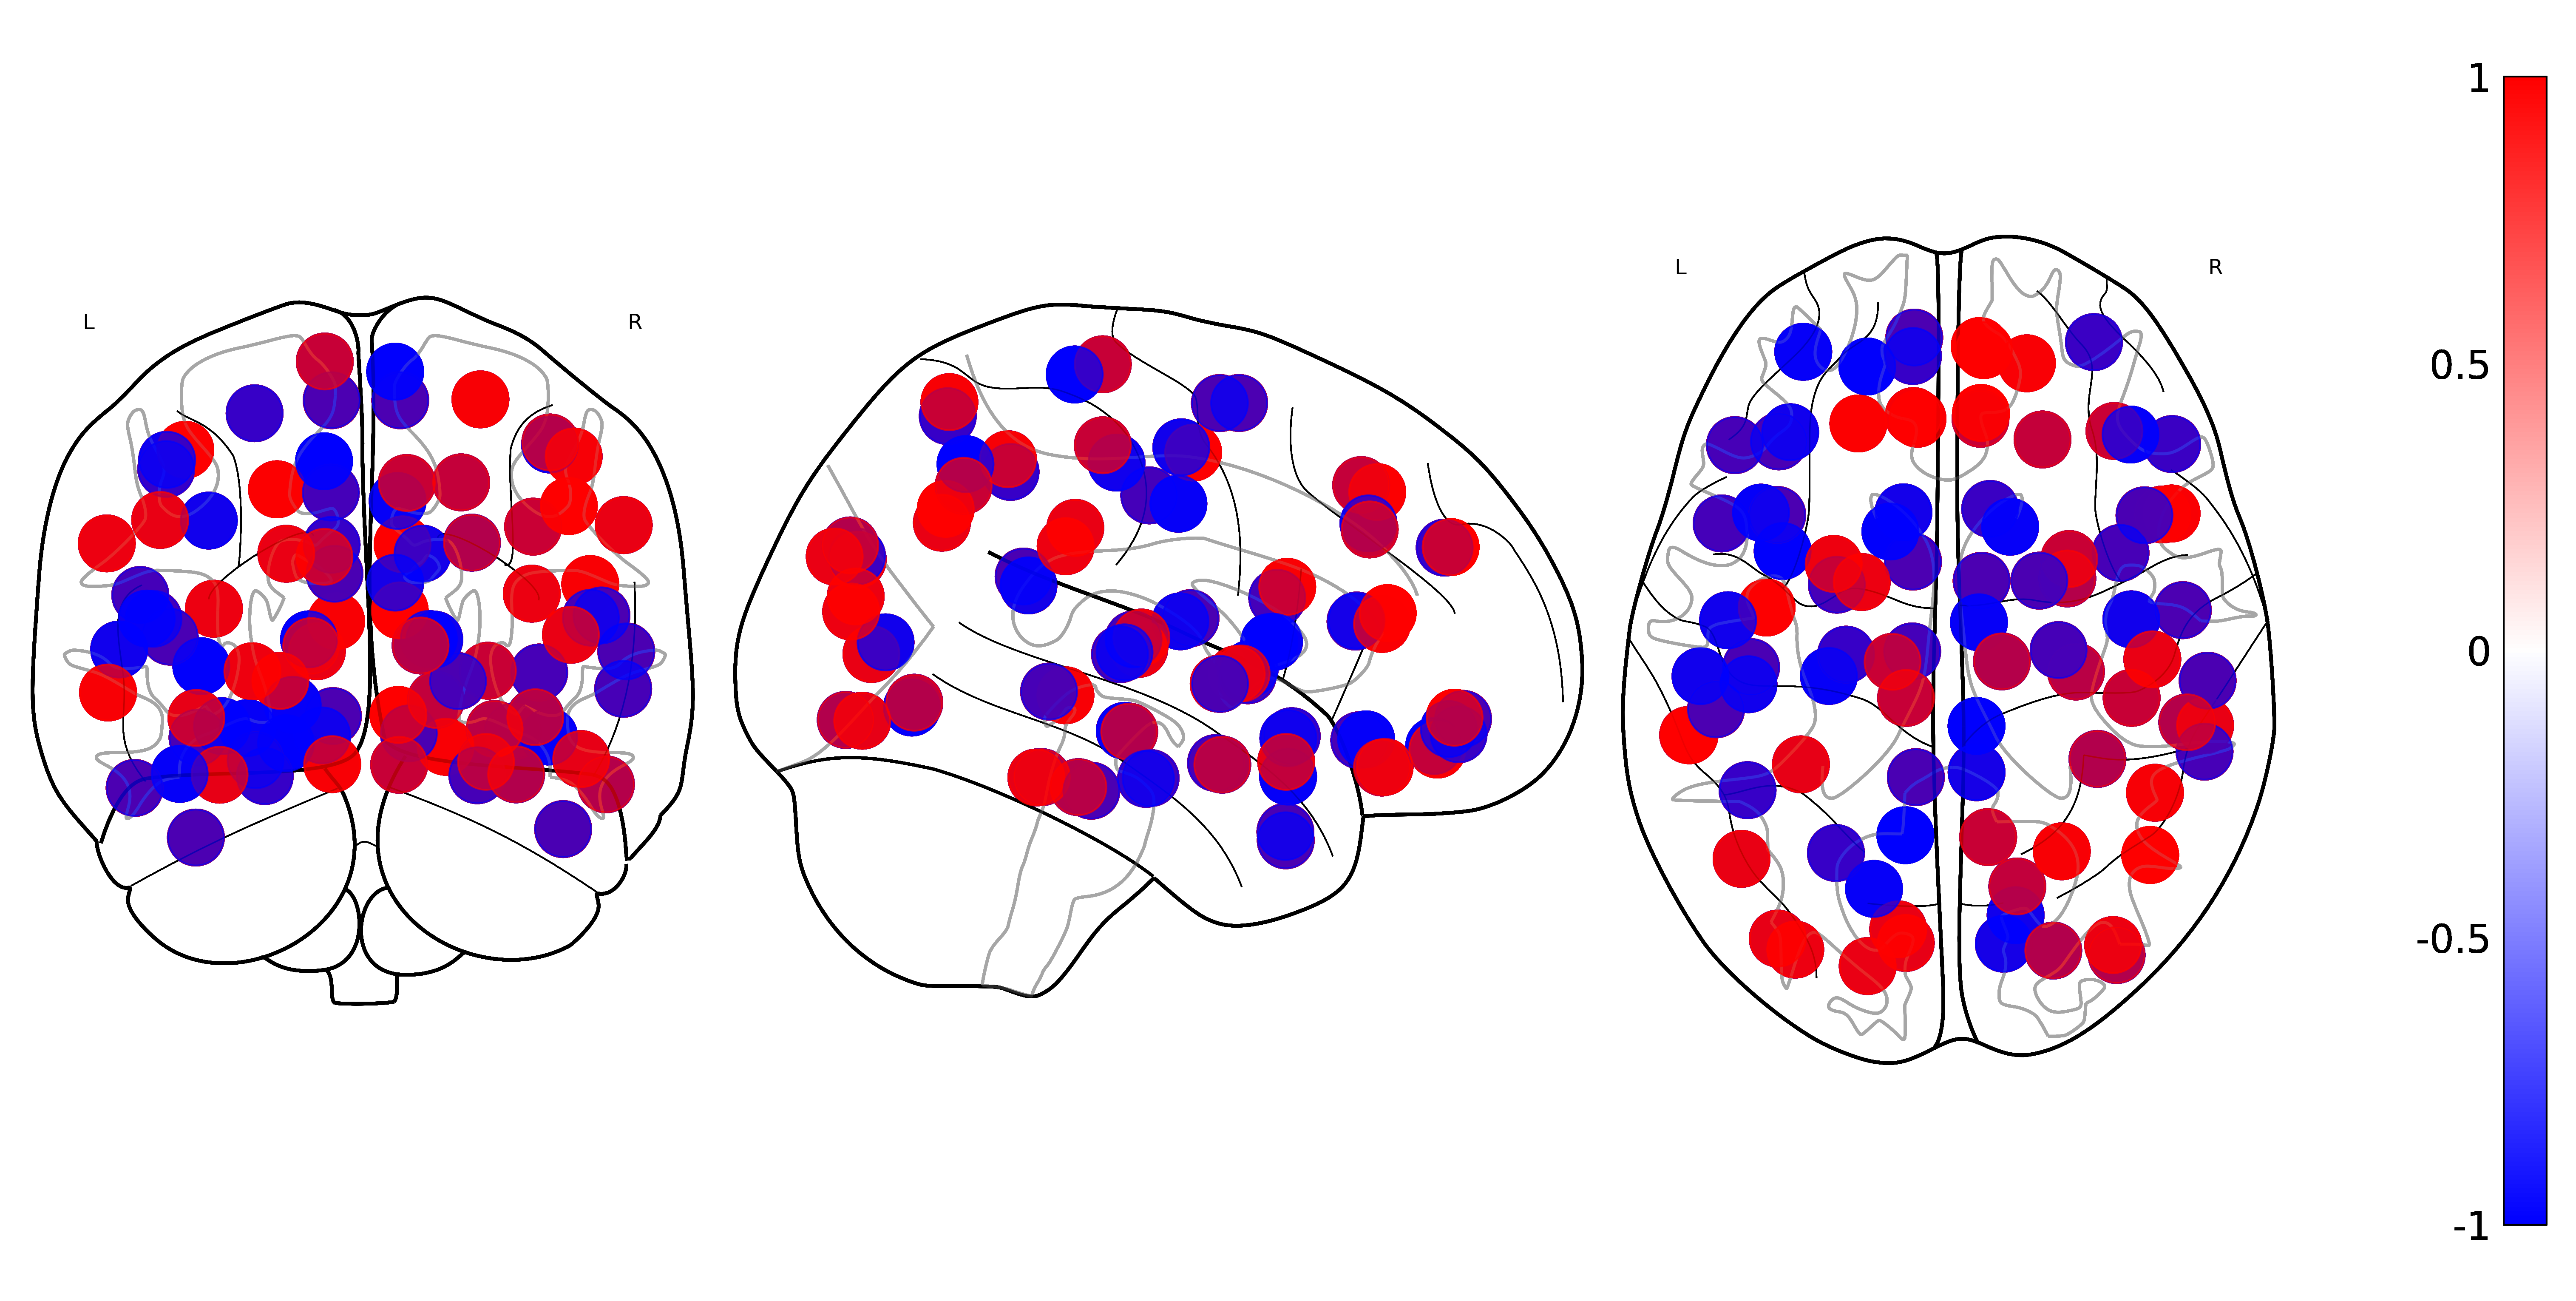

In [95]:
fig = plt.figure(figsize=[20,10], dpi=300)
plt.rcParams.update({'font.size': 22})


def update(i):
    print(i)
    plotting.plot_markers(
        sim_data[-1][500+i],
        coordinates[:90],
        node_cmap='bwr',
        node_vmin=-1,
        node_vmax=1,
        figure=fig,
        node_size=1000
    )

ani = matplotlib.animation.FuncAnimation(fig, update, frames=500, interval=1)

ani.save(f'animations/test_T={T}.gif', fps=10, savefig_kwargs={"facecolor": (1,1,1,1)})

### random stuff

In [14]:
sim_data = multi_metropolis(1, 600, 20, 25)

In [15]:
spins_list = sim_data[-2][:200]
c_matrix = sim_data[-1]

In [16]:
spins_list = spins_list.astype(int)

MovieWriter ffmpeg unavailable; using Pillow instead.


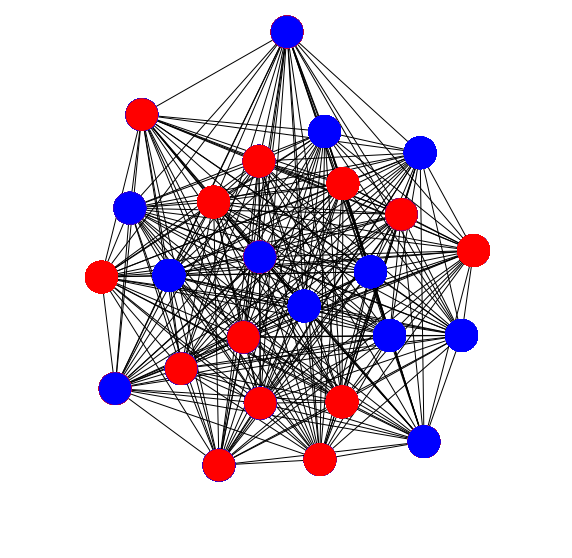

In [17]:

colors = np.array(['green', 'red', 'blue'])

spins = spins_list[0]

# Create Graph
graph = nx.from_numpy_matrix(c_matrix)
pos = nx.spring_layout(graph, k=0.2)

# Sequence of colors
node_colors = colors[spins]

# # Build plot
fig, ax = plt.subplots(figsize=(10,10))

node_size = 1000
nx.draw_networkx(graph, pos, node_color=node_colors, with_labels=False, node_size=node_size, ax=ax)

plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.axis('off')

def update(i):
    # ax.clear()
    # i = num // 3
    # j = num % 3 + 1
    # triad = sequence_of_letters[i:i+3]
    # path = ["O"] + ["".join(sorted(set(triad[:k + 1]))) for k in range(j)]

    # Background nodes
    # nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
    spins = spins_list[i]
    node_colors = colors[spins]
    nx.draw_networkx_nodes(graph, pos=pos, node_color=node_colors, node_size=node_size)
    # null_nodes.set_edgecolor("black")

    # # Query nodes
    # query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
    # query_nodes.set_edgecolor("white")
    # nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
    # edgelist = [path[k:k+2] for k in range(len(path) - 1)]
    # nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=idx_weights[:len(path)], ax=ax)

    # # Scale plot ax
    # ax.set_title("Frame %d:    "%(num+1) +  " - ".join(path), fontweight="bold")
    # ax.set_xticks([])
    # ax.set_yticks([])

    # return [ax]


ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(spins_list), interval=100)
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                 frames=len(mat), interval=100, blit=True)

ani.save('animations/test.gif', fps=30)

### nilearn

In [24]:
from nilearn import datasets
from nilearn import plotting

In [20]:
aal = datasets.fetch_atlas_aal()

In [22]:
data = datasets.fetch_development_fmri(n_subjects=1)


Dataset created in C:\Users\mylen/nilearn_data\development_fmri


Dataset created in C:\Users\mylen/nilearn_data\development_fmri\development_fmri



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


In [29]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=aal['maps'])

In [47]:
# plotting.plot_connectome(
#     DTI,
#     coordinates[:90],
#     edge_threshold="80%",
#     title="Test",
# )

In [44]:
node_values = np.random.choice([-1,1], size=90)

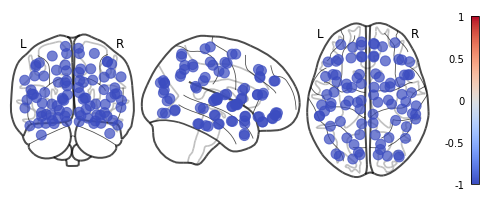

In [72]:
fig = plotting.plot_markers(
        sim_data[-1][0],
        coordinates[:90],
        node_cmap='coolwarm',
        node_vmin=-1,
        node_vmax=1
    )

### animation

In [43]:
coordinates_df = pd.DataFrame(index=aal['labels'], data=coordinates, columns=['x', 'y', 'z'])
coordinates_df.to_csv('coordinates.csv')

In [111]:
distances_i = []
distances_j = []
distances_dis = []
for row_i in coordinates_df[:90].iterrows():
    for row_j in coordinates_df[:90].iterrows():
        # print(row_i[1][0])
        distances_i.append(row_i[0])
        distances_j.append(row_j[0])
        distances_dis.append(np.sqrt(np.sum([(row_i[1][i] - row_j[1][i])**2 for i in range(3)])))

In [119]:
coordinates_df.index

Index(['Precentral_L', 'Precentral_R', 'Frontal_Sup_L', 'Frontal_Sup_R',
       'Frontal_Sup_Orb_L', 'Frontal_Sup_Orb_R', 'Frontal_Mid_L',
       'Frontal_Mid_R', 'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R',
       ...
       'Cerebelum_10_L', 'Cerebelum_10_R', 'Vermis_1_2', 'Vermis_3',
       'Vermis_4_5', 'Vermis_6', 'Vermis_7', 'Vermis_8', 'Vermis_9',
       'Vermis_10'],
      dtype='object', length=116)

In [123]:
distances = pd.DataFrame({'i':distances_i, 'j':distances_j, 'distance':distances_dis})
distances = pd.pivot(distances, index='i', columns='j', values='distance')
distances = distances.loc[coordinates_df.index[:90], coordinates_df.index[:90]]
distances

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Temporal_Sup_L,Temporal_Sup_R,Temporal_Pole_Sup_L,Temporal_Pole_Sup_R,Temporal_Mid_L,Temporal_Mid_R,Temporal_Pole_Mid_L,Temporal_Pole_Mid_R,Temporal_Inf_L,Temporal_Inf_R
Precentral_L,0.000000,80.079429,45.939775,71.235622,86.183706,101.858331,41.791291,87.230187,82.996841,111.209814,...,48.537736,107.593534,74.081733,112.090356,62.497317,113.929305,87.475211,119.188148,78.247566,120.574763
Precentral_R,80.079429,0.000000,74.366712,44.788252,103.566946,89.869366,86.990422,45.226850,111.559337,87.919874,...,105.425837,50.214504,111.221800,73.054919,114.056172,63.017209,118.302606,87.444551,119.875802,78.854224
Frontal_Sup_L,45.939775,74.366712,0.000000,40.583047,57.132420,68.793061,16.574141,56.810736,55.636015,76.252476,...,74.214318,101.597228,68.818092,91.404349,89.668349,113.432684,80.972022,99.520967,95.918756,117.028991
Frontal_Sup_R,71.235622,44.788252,40.583047,0.000000,70.771283,60.463030,56.018785,18.630745,77.377492,59.758610,...,98.344001,74.087735,90.338630,68.182963,111.078403,89.465474,98.658305,81.016184,114.588930,96.165427
Frontal_Sup_Orb_L,86.183706,103.566946,57.132420,70.771283,0.000000,35.018615,53.673237,73.471756,14.900230,50.073072,...,79.858251,103.587934,40.208039,72.525075,90.519366,112.933585,43.353813,71.538411,82.799466,105.362145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temporal_Mid_R,113.929305,63.017209,113.432684,89.465474,112.933585,94.538655,120.570284,81.263033,124.547051,93.530005,...,112.159207,17.594178,112.104930,55.036957,113.088404,0.000000,112.035097,61.713025,109.771697,22.251794
Temporal_Pole_Mid_L,87.475211,118.302606,80.972022,98.658305,43.353813,67.110816,71.917891,102.308592,43.700066,82.516656,...,56.878837,109.119346,14.422273,86.275004,60.994934,112.035097,0.000000,80.605387,46.018396,101.492649
Temporal_Pole_Mid_R,119.188148,87.444551,99.520967,81.016184,71.538411,45.865676,104.674310,69.199606,86.027354,45.004050,...,110.846866,55.021706,85.005690,15.866339,114.879170,61.713025,80.605387,0.000000,103.599783,47.398134
Temporal_Inf_L,78.247566,119.875802,95.918756,114.588930,82.799466,102.454832,86.022290,121.072996,81.864278,116.282960,...,31.405646,112.122329,44.383669,107.081111,22.465072,109.771697,46.018396,103.599783,0.000000,103.449854


In [140]:
T = 20.8
# spins = np.ones(90) *-1
spins = np.random.choice([-1,1], size=90)
sim_data = metropolis(spins, 10000, T, DTI)

In [134]:
sim_data[-2].shape

(90, 90)

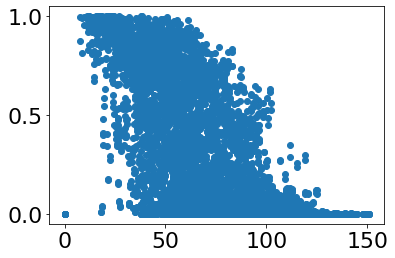

In [141]:
plt.scatter(distances, DTI)

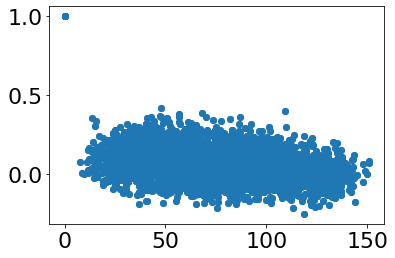

In [142]:
plt.scatter(distances, sim_data[-2])

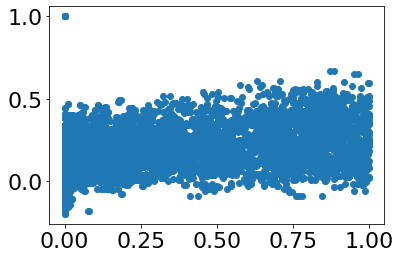

In [139]:
plt.scatter(DTI, sim_data[-2])